In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
image = cifar10.load_data()

In [4]:
(X_train,y_train),(X_test,y_test) = image

In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

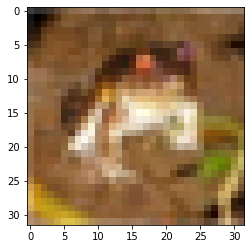

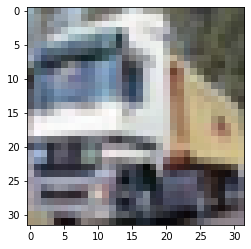

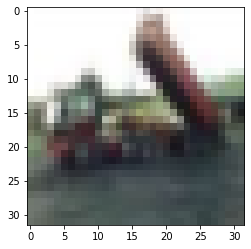

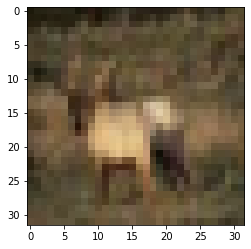

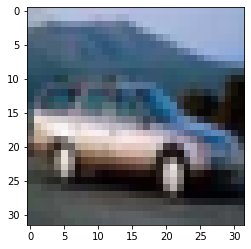

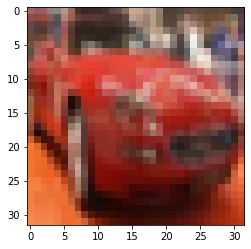

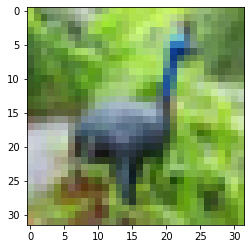

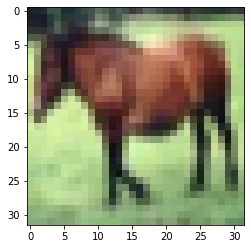

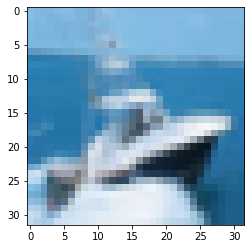

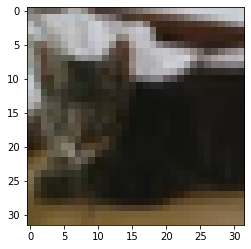

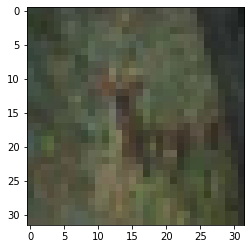

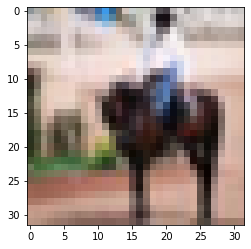

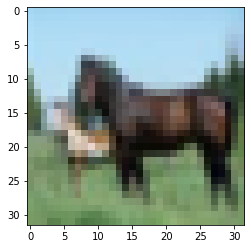

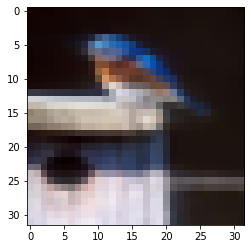

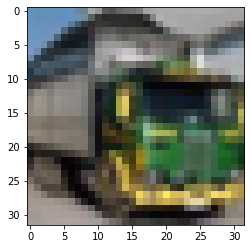

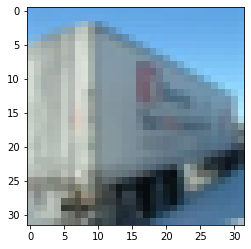

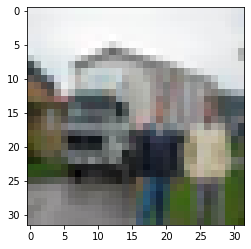

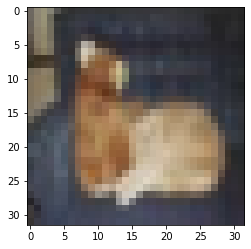

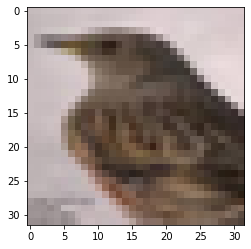

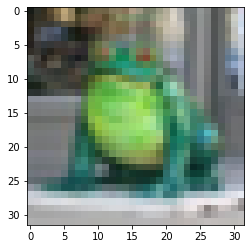

In [7]:
for i in range(20):
    plt.show(plt.imshow(X_train[i]))

In [8]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [9]:
X_train.shape

(50000, 32, 32, 3)

In [10]:
X_1 = X_train

In [11]:
X_1 = X_1.reshape(-1,32*32*3)

In [12]:
X_1

array([[0.23137255, 0.24313725, 0.24705882, ..., 0.48235294, 0.36078431,
        0.28235294],
       [0.60392157, 0.69411765, 0.73333333, ..., 0.56078431, 0.52156863,
        0.56470588],
       [1.        , 1.        , 1.        , ..., 0.31372549, 0.3372549 ,
        0.32941176],
       ...,
       [0.1372549 , 0.69803922, 0.92156863, ..., 0.04705882, 0.12156863,
        0.19607843],
       [0.74117647, 0.82745098, 0.94117647, ..., 0.76470588, 0.74509804,
        0.67058824],
       [0.89803922, 0.89803922, 0.9372549 , ..., 0.63921569, 0.63921569,
        0.63137255]])

In [13]:
X_2 = X_test

In [14]:
X_2 = X_2.reshape(-1,32*32*3)

In [15]:
X_2

array([[0.61960784, 0.43921569, 0.19215686, ..., 0.08235294, 0.2627451 ,
        0.43137255],
       [0.92156863, 0.92156863, 0.92156863, ..., 0.72941176, 0.78431373,
        0.78039216],
       [0.61960784, 0.74509804, 0.87058824, ..., 0.02745098, 0.03137255,
        0.02745098],
       ...,
       [0.07843137, 0.05882353, 0.04705882, ..., 0.09803922, 0.07843137,
        0.18431373],
       [0.09803922, 0.15686275, 0.04705882, ..., 0.36078431, 0.47058824,
        0.31372549],
       [0.28627451, 0.30588235, 0.29411765, ..., 0.10588235, 0.10196078,
        0.10196078]])

In [16]:
from tensorflow.keras.layers import Conv2D,Dense,MaxPool2D,Flatten
import tensorflow as tf

In [17]:
model = tf.keras.models.Sequential()

In [18]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[32,32,3]))

model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2,padding='valid'))

model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))

model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dense(10,activation='softmax'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

In [20]:
model.compile(optimizer='Adam',
             loss='sparse_categorical_crossentropy',
             metrics=['sparse_categorical_accuracy'])

In [21]:
model.fit(X_train,y_train,epochs=10,
         validation_data=(X_test,y_test),
         batch_size=128)

Epoch 1/10
391/391 [==============================] - 99s 254ms/step - loss: 1.4689 - sparse_categorical_accuracy: 0.4701 - val_loss: 1.1499 - val_sparse_categorical_accuracy: 0.5946
Epoch 2/10
391/391 [==============================] - 97s 249ms/step - loss: 1.0300 - sparse_categorical_accuracy: 0.6395 - val_loss: 0.9925 - val_sparse_categorical_accuracy: 0.6534
Epoch 3/10
391/391 [==============================] - 106s 270ms/step - loss: 0.8313 - sparse_categorical_accuracy: 0.7092 - val_loss: 0.8480 - val_sparse_categorical_accuracy: 0.7055
Epoch 4/10
391/391 [==============================] - 98s 251ms/step - loss: 0.7050 - sparse_categorical_accuracy: 0.7562 - val_loss: 0.7769 - val_sparse_categorical_accuracy: 0.7300
Epoch 5/10
391/391 [==============================] - 98s 250ms/step - loss: 0.6049 - sparse_categorical_accuracy: 0.7900 - val_loss: 0.7460 - val_sparse_categorical_accuracy: 0.7424
Epoch 6/10
391/391 [==============================] - 99s 252ms/step - loss: 0.5189 

In [22]:
test,accuracy = model.evaluate(X_test,y_test)

313/313 [==============================] - 6s 18ms/step - loss: 0.9629 - sparse_categorical_accuracy: 0.7506


In [29]:
print(test)

0.962928295135498


In [30]:
print(accuracy)

0.7505999803543091


In [31]:
predict = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [32]:
from sklearn.metrics import classification_report,confusion_matrix

In [33]:
print(classification_report(predict,y_test))

              precision    recall  f1-score   support

           0       0.81      0.75      0.78      1085
           1       0.87      0.85      0.86      1029
           2       0.66      0.62      0.64      1064
           3       0.51      0.62      0.56       829
           4       0.67      0.71      0.69       940
           5       0.65      0.70      0.67       940
           6       0.84      0.77      0.81      1088
           7       0.79      0.80      0.79       991
           8       0.86      0.85      0.85      1012
           9       0.84      0.82      0.83      1022

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.76      0.75      0.75     10000



In [34]:
print(confusion_matrix(y_test,predict))

[[810  14  52   9  18   7   8   8  51  23]
 [ 18 872   1   5   1   3   7   1  23  69]
 [ 74   9 659  50  63  41  61  27   8   8]
 [ 31   9  98 510  75 130  69  40  15  23]
 [ 26  10  89  38 669  36  56  63  10   3]
 [ 13  10  58 135  39 654  29  43  10   9]
 [  8   9  47  33  25  15 843   6   6   8]
 [ 11   7  39  35  39  46   7 788   7  21]
 [ 57  33  13   7   5   4   5   3 858  15]
 [ 37  56   8   7   6   4   3  12  24 843]]


In [35]:
from tensorflow.keras.callbacks import EarlyStopping

In [36]:
early_stop = EarlyStopping(monitor='val_loss',patience=5,verbose=1,mode='min')

In [37]:
model = tf.keras.models.Sequential()

In [38]:


model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[32,32,3]))

model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2,padding='valid'))

model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))

model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dense(10,activation='softmax'))

In [39]:
model.compile(optimizer='Adam',
             loss='sparse_categorical_crossentropy',
             metrics=['sparse_categorical_accuracy'])

In [40]:
model.fit(X_train,y_train,epochs=10,callbacks=[early_stop],
         validation_data=(X_test,y_test),
         batch_size=128)

Epoch 1/10
391/391 [==============================] - 97s 248ms/step - loss: 1.4827 - sparse_categorical_accuracy: 0.4648 - val_loss: 1.2127 - val_sparse_categorical_accuracy: 0.5645
Epoch 2/10
391/391 [==============================] - 98s 250ms/step - loss: 1.0514 - sparse_categorical_accuracy: 0.6267 - val_loss: 0.9583 - val_sparse_categorical_accuracy: 0.6602
Epoch 3/10
391/391 [==============================] - 98s 251ms/step - loss: 0.8598 - sparse_categorical_accuracy: 0.7002 - val_loss: 0.8729 - val_sparse_categorical_accuracy: 0.6976
Epoch 4/10
391/391 [==============================] - 98s 250ms/step - loss: 0.7417 - sparse_categorical_accuracy: 0.7405 - val_loss: 0.8374 - val_sparse_categorical_accuracy: 0.7114
Epoch 5/10
391/391 [==============================] - 106s 271ms/step - loss: 0.6509 - sparse_categorical_accuracy: 0.7749 - val_loss: 0.7551 - val_sparse_categorical_accuracy: 0.7375
Epoch 6/10
391/391 [==============================] - 100s 255ms/step - loss: 0.5774

In [41]:
test_loss ,accu = model.evaluate(X_test,y_test)

313/313 [==============================] - 5s 15ms/step - loss: 0.8540 - sparse_categorical_accuracy: 0.7519


In [42]:
print(accu)

0.7519000172615051


In [43]:
pred = model.predict_classes(X_test)

In [45]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.80      0.76      0.78      1000
           1       0.86      0.88      0.87      1000
           2       0.62      0.69      0.65      1000
           3       0.57      0.56      0.56      1000
           4       0.64      0.82      0.72      1000
           5       0.74      0.53      0.62      1000
           6       0.77      0.84      0.80      1000
           7       0.83      0.78      0.81      1000
           8       0.89      0.83      0.86      1000
           9       0.87      0.82      0.85      1000

    accuracy                           0.75     10000
   macro avg       0.76      0.75      0.75     10000
weighted avg       0.76      0.75      0.75     10000



In [46]:
print(accuracy,'\n',accu)

0.7505999803543091 
 0.7519000172615051
